In [ ]:
# This project is available on kaggle https://www.kaggle.com/code/henryshan/studenthwpred

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/rawhwpre/rawstu.xlsx


In [327]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [328]:
data = pd.read_excel("/kaggle/input/stusort/stusort.xlsx")

In [329]:
data[['electronicsusage','selfmanage','difficulty','singletime(min)']].describe()

,electronicsusage,selfmanage,difficulty,singletime(min)
count,41.000000,41.000000,41.000000,41.000000
mean,6.219512,8.975610,5.365854,49.073171
std,3.053786,6.218874,2.870158,20.651138
min,0.000000,0.000000,1.000000,10.000000
25%,4.000000,5.000000,3.000000,40.000000
50%,6.000000,8.000000,5.000000,50.000000
75%,9.000000,14.000000,7.000000,60.000000
max,10.000000,20.000000,10.000000,90.000000


In [330]:
data = data.rename(columns = {'singletime(min)': 'singletime_min'})

In [331]:
data = data.rename(columns = {'totaltime(h)': 'totaltime_h'})

In [332]:
data.columns

Index(['ap2', 'gender', 'mbti', 'electronicsusage', 'selfmanage', 'difficulty',
       'singletime_min', 'totaltime_h'],
      dtype='object')

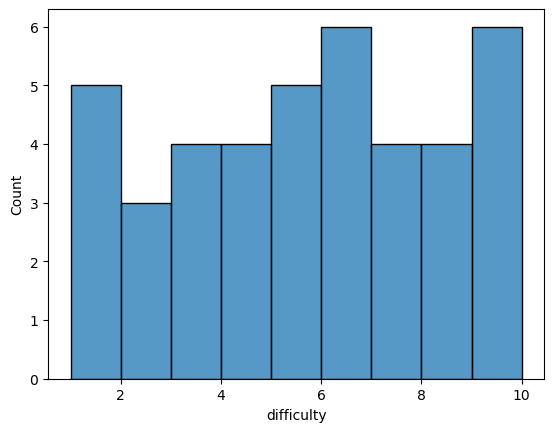

In [333]:
fig = sns.histplot(data['difficulty'], bins =9)

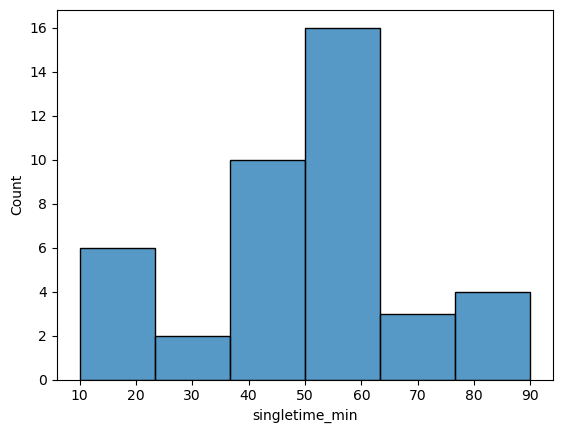

In [334]:
fig = sns.histplot(data['singletime_min'], bins =6)

In [335]:
data.corr()

,ap2,gender,mbti,electronicsusage,selfmanage,difficulty,singletime_min,totaltime_h
ap2,1.000000,-0.054291,0.037015,-0.114316,0.123719,-0.001927,-0.089811,0.127048
gender,-0.054291,1.000000,-0.104844,0.228443,0.130700,-0.013979,-0.241418,0.103606
mbti,0.037015,-0.104844,1.000000,-0.225621,0.112272,0.273600,0.038188,0.022566
electronicsusage,-0.114316,0.228443,-0.225621,1.000000,-0.102391,0.136076,-0.073995,0.292435
selfmanage,0.123719,0.130700,0.112272,-0.102391,1.000000,-0.126945,0.069704,0.290885
difficulty,-0.001927,-0.013979,0.273600,0.136076,-0.126945,1.000000,-0.047281,0.115399
singletime_min,-0.089811,-0.241418,0.038188,-0.073995,0.069704,-0.047281,1.000000,0.335459
totaltime_h,0.127048,0.103606,0.022566,0.292435,0.290885,0.115399,0.335459,1.000000


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


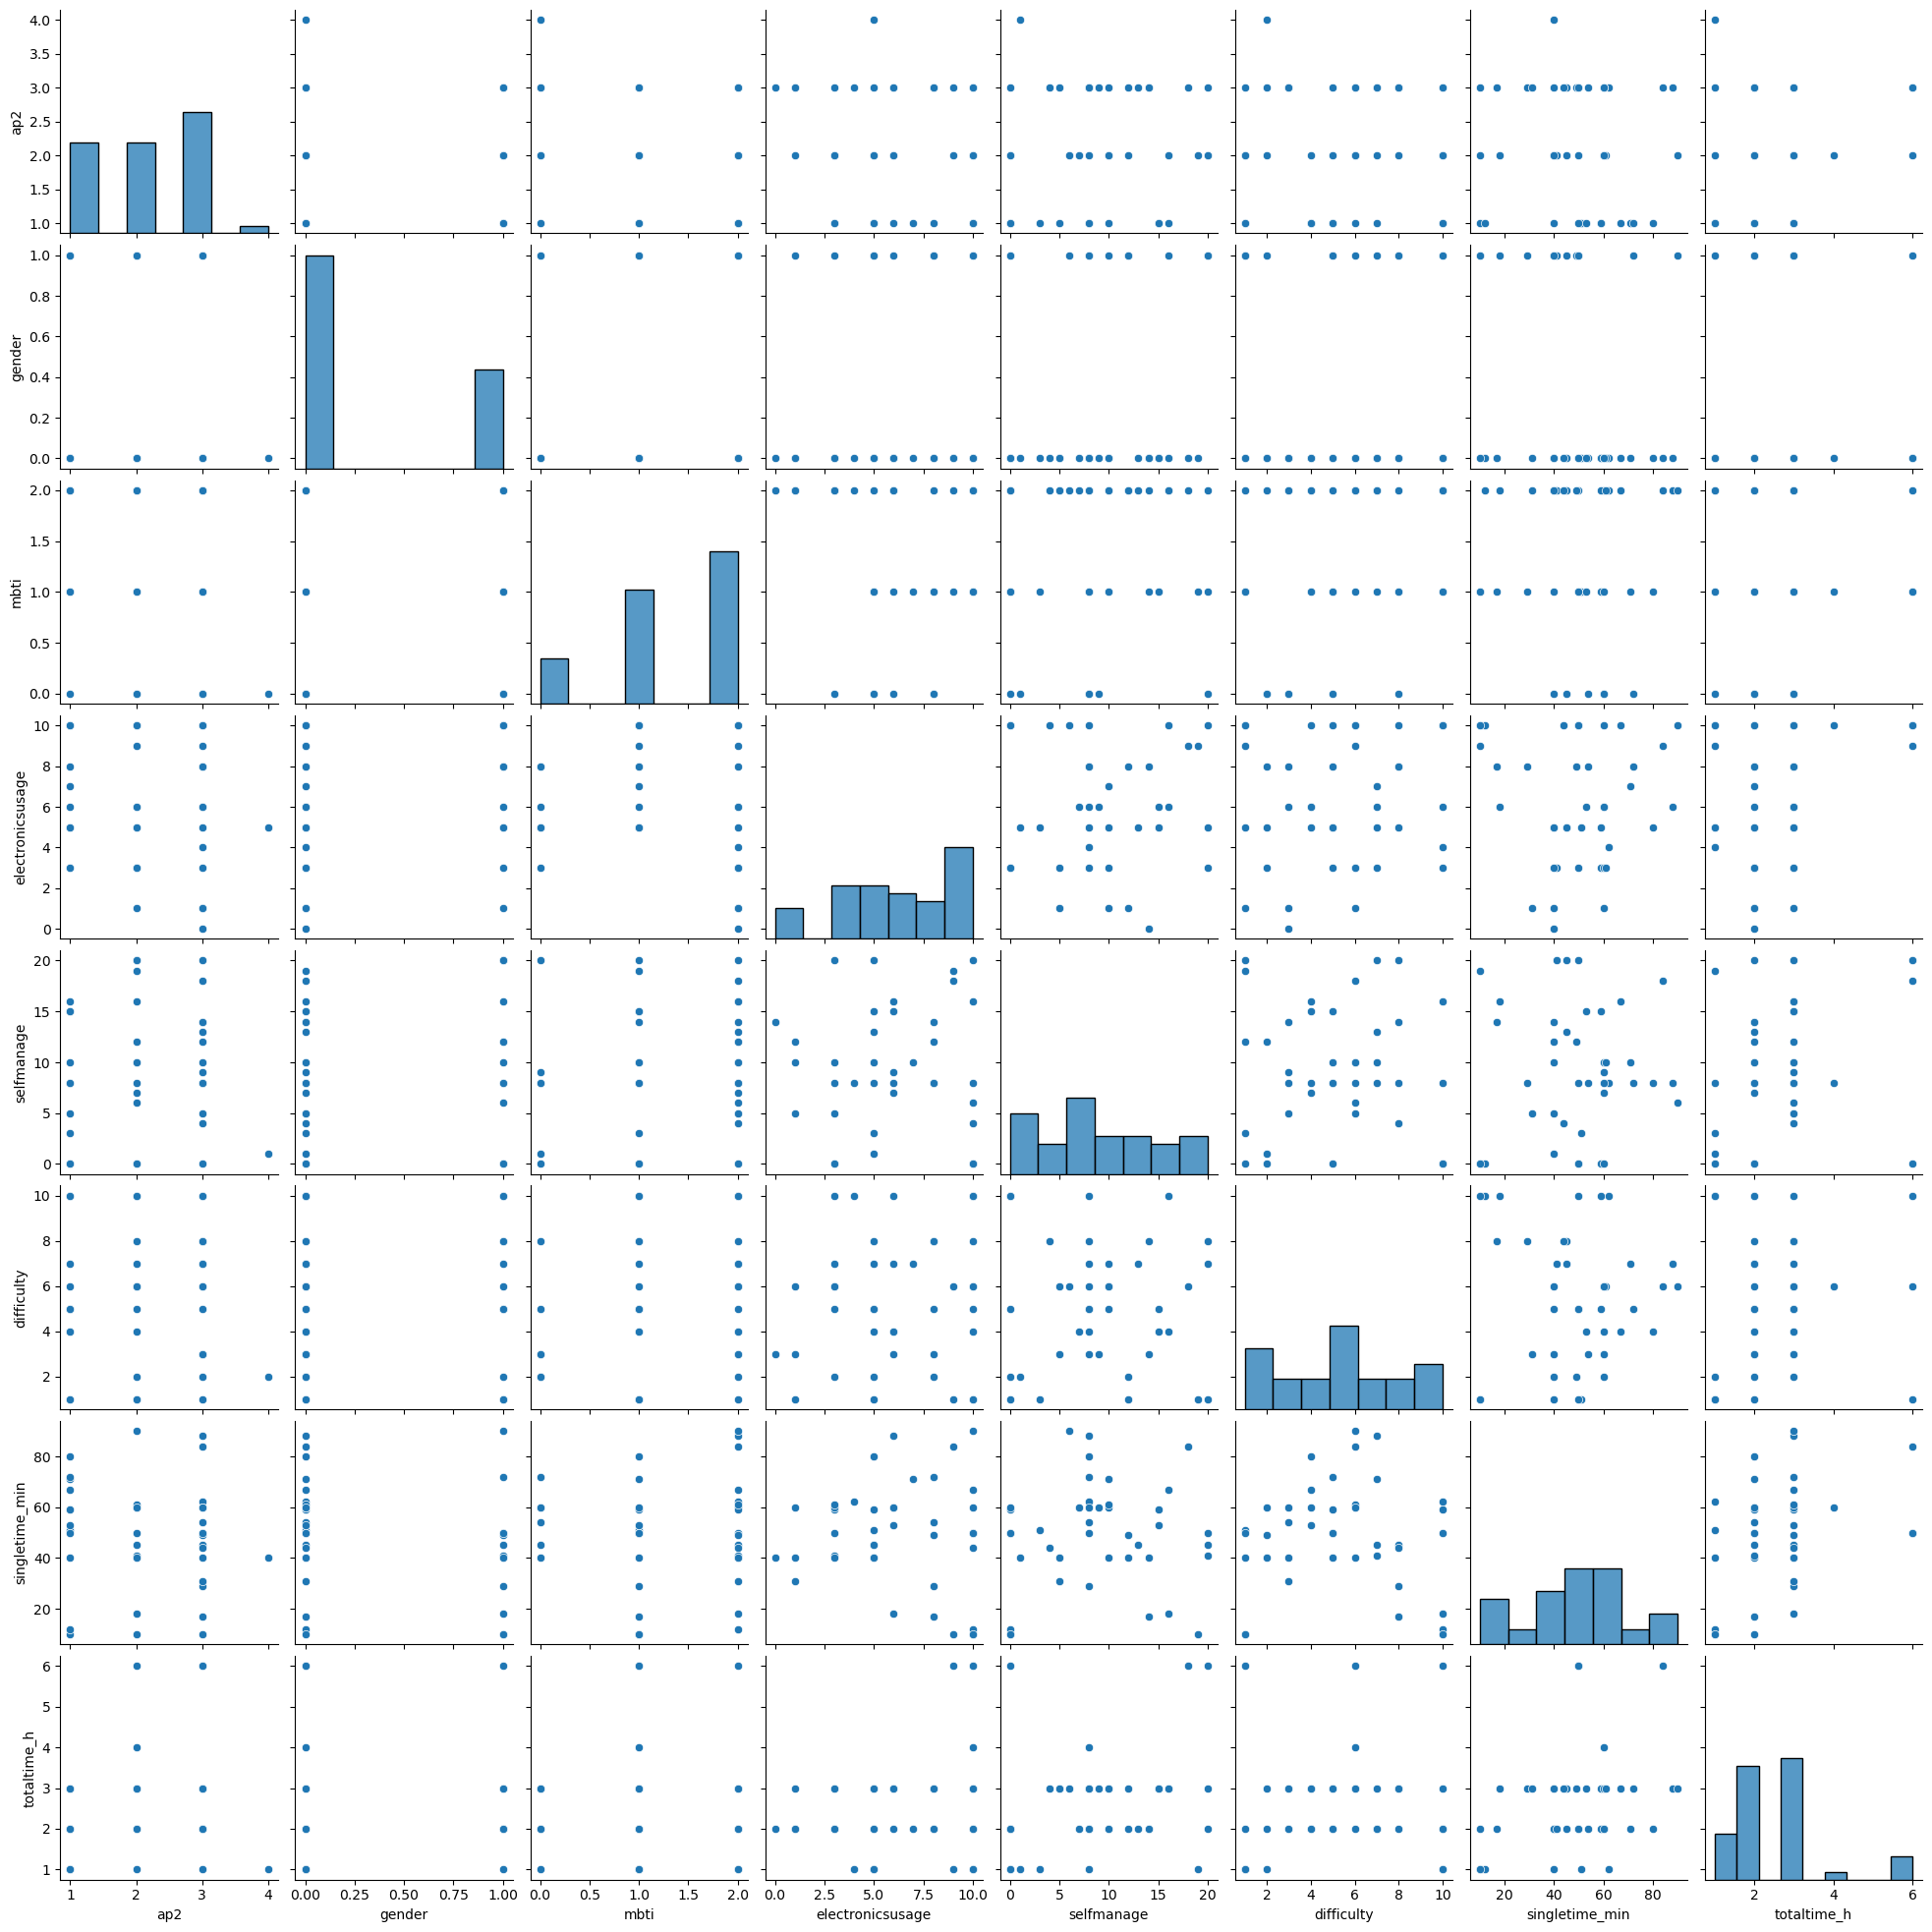

In [336]:
sns.pairplot(data)

<Axes: xlabel='ap2', ylabel='totaltime_h'>

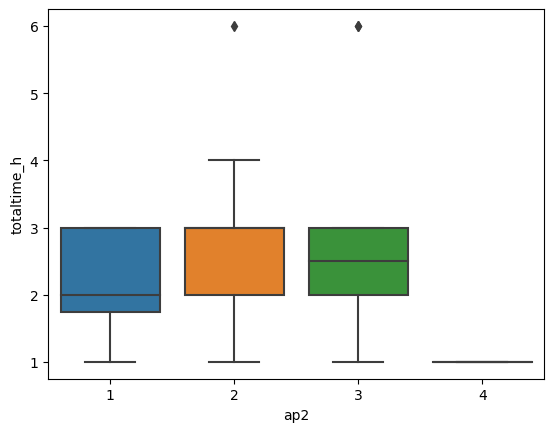

In [356]:
sns.boxplot(x = "ap2", y = "totaltime_h", data = data)

<Axes: xlabel='gender', ylabel='totaltime_h'>

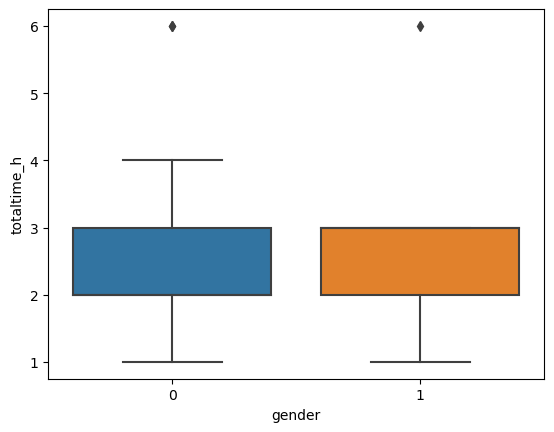

In [358]:
sns.boxplot(x = "gender", y = "totaltime_h", data = data)

In [339]:
formula = 'totaltime_h ~ electronicsusage * selfmanage * difficulty * singletime_min+ C(ap2)+ C(mbti)+ C(gender)'

In [340]:
model = smf.ols(formula, data = data).fit()

In [341]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            totaltime_h   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     7.605
Date:                Sun, 30 Jul 2023   Prob (F-statistic):           2.06e-05
Time:                        08:18:02   Log-Likelihood:                -20.019
No. Observations:                  41   AIC:                             84.04
Df Residuals:                      19   BIC:                             121.7
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                                 6.1113      4.940      1.237      0.231      -4.228      16.450
C(ap2)[T.2]                                               0.8233      0.352      2.341      0.030       0.087       1.559
C(ap2)[T.3]                                               0.6674      0.273      2.441      0.025       0.095       1.240
C(ap2)[T.4]                                              -0.6481      0.794     -0.816      0.425      -2.311       1.014
C(mbti)[T.1]                                             -0.1904      0.368     -0.518      0.611      -0.960       0.579
C(mbti)[T.2]                                             -0.7172      0.346     -2.072      0.052      -1.442       0.007
C(gender)[T.1]                                            0.2532      0.280      0.904      0.377      -0.333       0.839
electronicsusage                                         -0.3809      0.495     -0.769      0.452      -1.418       0.656
selfmanage                                               -1.1616      0.517     -2.247      0.037      -2.243      -0.080
electronicsusage:selfmanage                               0.1101      0.056      1.982      0.062      -0.006       0.226
difficulty                                                0.6305      1.010      0.624      0.540      -1.484       2.745
electronicsusage:difficulty                              -0.0799      0.102     -0.784      0.442      -0.293       0.133
selfmanage:difficulty                                     0.1034      0.088      1.174      0.255      -0.081       0.288
electronicsusage:selfmanage:difficulty                   -0.0111      0.010     -1.150      0.264      -0.031       0.009
singletime_min                                           -0.0534      0.092     -0.582      0.567      -0.246       0.139
electronicsusage:singletime_min                          -0.0059      0.010     -0.598      0.557      -0.026       0.015
selfmanage:singletime_min                                 0.0243      0.011      2.285      0.034       0.002       0.047
electronicsusage:selfmanage:singletime_min               -0.0014      0.001     -1.260      0.223      -0.004       0.001
difficulty:singletime_min                                -0.0138      0.018     -0.770      0.451      -0.051       0.024
electronicsusage:difficulty:singletime_min                0.0034      0.002      1.821      0.084      -0.001       0.007
selfmanage:difficulty:singletime_min                     -0.0025      0.002     -1.413      0.174      -0.006       0.001
electronicsusage:selfmanage:difficulty:singletime_min     0.0001      0.000      0.738      0.470      -0.000       0.001
=================================

**Mathematical Model:**
totaltime_h = 4.5584 + 
0.4524 * C(ap2)[T.2] + 0.4475 * C(ap2)[T.3]- 0.5519 * C(ap2)[T.4] + 0.4160 * C(mbti)[T.1] - 0.0500 * C(mbti)[T.2] + 1.0371 * C(mbti)[T.3] - 0.6504 * C(mbti)[T.4] + 0.0258 * C(gender)[T.1] - 0.2584 * electronicsusage - 0.6734 * selfmanage + 0.0565 * electronicsusage * selfmanage + 0.6572 * difficulty - 0.0873 * electronicsusage * difficulty + 0.0564 * selfmanage * difficulty - 0.0055 * electronicsusage * selfmanage * difficulty - 0.0356 * singletime_min - 0.0042 * electronicsusage * singletime_min + 0.0128 * selfmanage * singletime_min - 0.0003 * electronicsusage * selfmanage * singletime_min - 0.0155 * difficulty * singletime_min + 0.0033 * electronicsusage * difficulty * singletime_min - 0.0011 * selfmanage * difficulty * singletime_min - 1.312e-05 * electronicsusage * selfmanage * difficulty * singletime_min

In [342]:
data['predicted_totaltime_h'] = model.predict(data)

In [343]:
data

,ap2,gender,mbti,electronicsusage,selfmanage,difficulty,singletime_min,totaltime_h,predicted_totaltime_h
0,1,1,1,10,0,1,10,1,1.278443
1,3,0,2,4,8,10,62,1,1.527143
2,1,0,2,10,0,10,12,1,1.005791
3,2,0,1,9,19,1,10,1,1.092681
4,4,0,0,5,1,2,40,1,1.000000
5,1,0,1,5,3,1,51,1,0.850317
6,3,0,2,1,10,6,60,2,2.053290
7,3,0,2,3,8,5,50,2,2.497497
8,2,0,2,6,7,4,60,2,2.218950
9,3,1,1,10,0,10,10,2,2.268522


 since the actural total time is type `int`, we round the predicted number to an `int` type.

In [344]:
data['predicted_totaltime_h'] = round(model.predict(data),0)

In [345]:
data

,ap2,gender,mbti,electronicsusage,selfmanage,difficulty,singletime_min,totaltime_h,predicted_totaltime_h
0,1,1,1,10,0,1,10,1,1.0
1,3,0,2,4,8,10,62,1,2.0
2,1,0,2,10,0,10,12,1,1.0
3,2,0,1,9,19,1,10,1,1.0
4,4,0,0,5,1,2,40,1,1.0
5,1,0,1,5,3,1,51,1,1.0
6,3,0,2,1,10,6,60,2,2.0
7,3,0,2,3,8,5,50,2,2.0
8,2,0,2,6,7,4,60,2,2.0
9,3,1,1,10,0,10,10,2,2.0


In [354]:
# checking: 1st data entry: 1	1	1	10	0	1	10	1	1.0
new_data = pd.DataFrame({'ap2': [1],#1,2,3,4
                         'gender': [1],#1,0
                         'mbti': [1],#0,1,2
                         'electronicsusage': [10],#1-10
                         'selfmanage': [0],#0-20
                         'difficulty': [1],#1-10
                         'singletime_min': [10]})#1-90

# Make predictions for the new data entry
predicted_total_time = model.predict(new_data)
print(predicted_total_time)

0    1.278443
dtype: float64


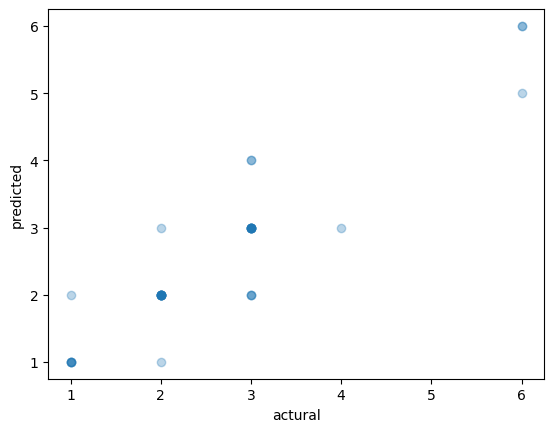

In [355]:
plt.scatter(data['totaltime_h'], data['predicted_totaltime_h'], alpha=0.3)
plt.xlabel("actural")
plt.ylabel('predicted')
plt.show()

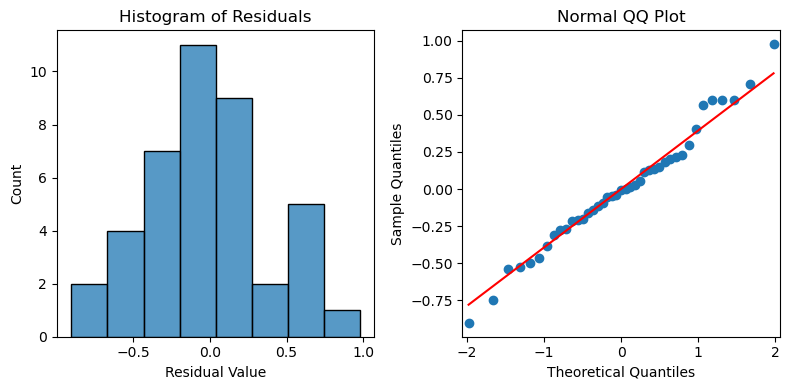

In [361]:
residuals = model.resid
fig, axes = plt.subplots(1, 2, figsize = (8,4))
sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")
sm.qqplot(residuals, line='s',ax = axes[1])
axes[1].set_title("Normal QQ Plot")
plt.tight_layout()
plt.show()

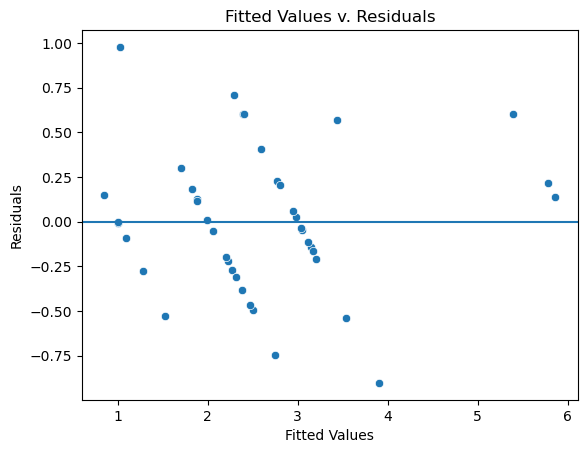

In [362]:
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
fig.set_title("Fitted Values v. Residuals")
fig.axhline(0)
plt.show()